## Задача 1.
### Построить распределение объектов по цене аренды (поле price). Вывести на заголовок графика: медианное значение, 25 и 75 квантили

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import DistanceMetric
from math import radians
import seaborn as sns

#### извлечение данных

In [2]:
df = pd.read_csv("278houses.csv", sep = ',')

#### преобразования типа данных, точнее изменили колонку price, а также переведем долготу и ширину в радианы.

In [3]:
df['price'] = df['price'].str.replace(",", "").astype('int32')
df['latitude'] = np.radians(df['latitude'])
df['longitude'] = np.radians(df['longitude'])

In [4]:
df.dtypes

Unnamed: 0         int64
region            object
id                 int64
link              object
price              int32
price_units       object
type              object
area               int64
area_units        object
misc              object
phone             object
main_img_link     object
desc_short        object
title             object
features          object
price_feature     object
address           object
latitude         float64
longitude        float64
phone_int         object
ref               object
images            object
dtype: object

#### гистограмма  цены

Text(0.5, 1.0, 'price')

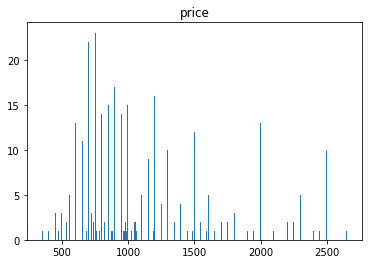

In [5]:
fig, axs = plt.subplots(1, 1)
n_bins = len(df['price'])
axs.hist(df['price'], bins=n_bins)
axs.set_title('price')

#### медианное значение

In [6]:
median_price=df['price'].median()
median_price

950.0

#### квантиль 25

In [7]:
quantile_25=np.quantile(df['price'], 0.25)
quantile_25

750.0

#### квантиль 75

In [8]:
quantile_75=np.quantile(df['price'], 0.75)
quantile_75

1300.0

#### построили распределение объектов по цене аренды, отметив медианное значение, 25 и 75 квантили

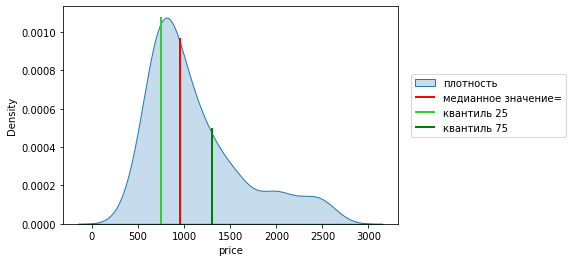

In [9]:
snsplot = sns.kdeplot(df['price'], shade=True)
fig = snsplot.get_figure()
plt.vlines(x = median_price, ymin = 0, ymax = 0.00097, color = 'red', linewidth=2)
plt.vlines(x = quantile_25, ymin = 0, ymax = 0.00108, color = 'limegreen', linewidth=2)
plt.vlines(x = quantile_75, ymin = 0, ymax = 0.0005, color = 'green', linewidth=2)
plt.legend(('плотность','медианное значение=', 'квантиль 25', 'квантиль 75'), loc=(1.04, 0.4))
plt.show()

## Задача 2.
### Для объектов у которых значение цены лежит между 25 и 75 квантилем (см задача 1) построить распределение площади. Вывести на заголовок графика: медианное значение, 25 и 75 квантили

#### создаем новую таблицу данных, которые входят те строки, в которых цены лежат между 25 и 75 квантилем

In [10]:
df2=df[df['price'].between(quantile_25,quantile_75)]

#### гисторграмма  площади

Text(0.5, 1.0, 'area')

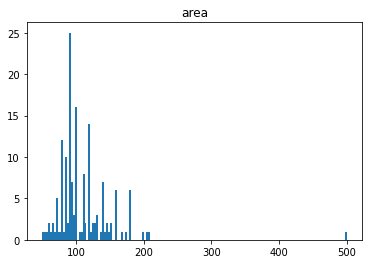

In [11]:
fig, axs = plt.subplots(1, 1)
n_bins = len(df2['area'])
axs.hist(df2['area'], bins=n_bins)
axs.set_title('area')

#### медианное значение

In [12]:
median_area=df2['area'].median()
median_area

100.0

#### квантиль 25

In [13]:
quantile_25_area=np.quantile(df2['area'], 0.25)
quantile_25_area

88.25

#### квантиль 75

In [14]:
quantile_75_area=np.quantile(df2['area'], 0.75)
quantile_75_area

122.25

#### построили распределение площади, цены которого лежат между 25 и 75 квантилем, отметив медианное значение, 25 и 75 квантили

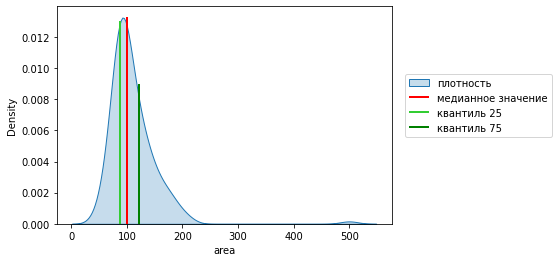

In [15]:
snsplot = sns.kdeplot(df2['area'], shade=True)
fig = snsplot.get_figure()
plt.vlines(x = median_area, ymin = 0, ymax = 0.0133, color = 'red', linewidth=2)
plt.vlines(x = quantile_25_area, ymin = 0, ymax = 0.013, color = 'limegreen', linewidth=2)
plt.vlines(x = quantile_75_area, ymin = 0, ymax = 0.009, color = 'green', linewidth=2)
plt.legend(('плотность','медианное значение', 'квантиль 25', 'квантиль 75'), loc=(1.04, 0.4))
plt.show()

## Задача 3.
### Для объектов у которых значение цены лежит между 25 и 75 квантилем (см задача 1) найти количество объектов в радиусе 1 км.
### Построить распределение этого количества.

#### создаем новую таблицу данных, в которых latitude и longitude не Nan, из df

In [16]:
df_for_count=df[['id','latitude','longitude']].dropna(subset=['latitude', 'longitude'])
df_for_count

,id,latitude,longitude
0,30137164,0.647269,-0.145138
1,30716892,0.647925,-0.149197
2,30713619,0.647431,-0.142544
3,30712975,0.647131,-0.141643
4,30716612,0.646143,-0.138526
...,...,...,...
274,44874,0.647496,-0.141777
275,30630457,0.648246,-0.149081
276,29453518,0.647348,-0.141641
277,30653775,0.647615,-0.151555


#### создаем новую таблицу данных, в которых latitude и longitude не Nan, из df2

In [17]:
df2_for_count=df2[['id','price','latitude','longitude']].dropna(subset=['latitude', 'longitude'])
df2_for_count

,id,price,latitude,longitude
1,30716892,885,0.647925,-0.149197
3,30712975,1200,0.647131,-0.141643
7,30716366,1000,0.646552,-0.136722
12,30440888,850,0.648030,-0.149955
13,30402407,900,0.647904,-0.133563
...,...,...,...,...
273,30406112,750,0.648922,-0.130037
274,44874,950,0.647496,-0.141777
276,29453518,750,0.647348,-0.141641
277,30653775,1000,0.647615,-0.151555


#### подключаем метрику для вычисления геодезического расстояния

In [18]:
dist = DistanceMetric.get_metric('haversine')

#### вычисляем расстояния между объектами

In [19]:
np_dist=dist.pairwise(df2_for_count[['latitude','longitude']].to_numpy(),df_for_count[['latitude','longitude']].to_numpy() )*6373

#### считаем количество в радиусе 1 км

In [20]:
np_count=np.array([np.array(df2_for_count['id']),np.count_nonzero(np_dist <= 1,axis=1)-1]).T

#### из полученного массива данных np_count создаем новую таблицу

In [21]:
df_count= pd.DataFrame(np_count,columns=['id','count'],index=df2_for_count.id.unique())

#### нужно соединить таблицу df2_for_count с df_count

In [22]:
df_price_count=df2_for_count[['id','price']].join(df_count.set_index('id'), on='id')

#### в итоге, получили, что для каждого объекта, у которых значение цены лежат между 25 и 75 квантилем, была посчитана количество объектов в радиусе 1 км.

In [23]:
df_price_count

,id,price,count
1,30716892,885,9
3,30712975,1200,19
7,30716366,1000,0
12,30440888,850,0
13,30402407,900,8
...,...,...,...
273,30406112,750,4
274,44874,950,11
276,29453518,750,18
277,30653775,1000,10


#### распределение количества объектов 

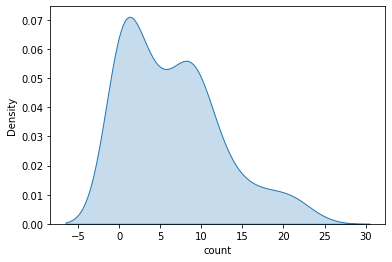

In [24]:
snsplot = sns.kdeplot(df_price_count['count'], shade=True)
fig = snsplot.get_figure()
plt.show()